In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
bs = 64
SEED = 2

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
path.ls()[:5]

[WindowsPath('C:/Users/sepolt/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/sepolt/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/sepolt/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/sepolt/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),
 WindowsPath('C:/Users/sepolt/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg')]

In [5]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [6]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=SEED).label_from_re(r'([^/]+)_\d+.jpg$')

In [7]:
def get_data(size, bs, padding_mode='reflection'):
    return src.transform(tfms, size=size, padding_mode=padding_mode).databunch(bs=bs).normalize(imagenet_stats)

In [8]:
data = get_data(224, bs, 'zeros')

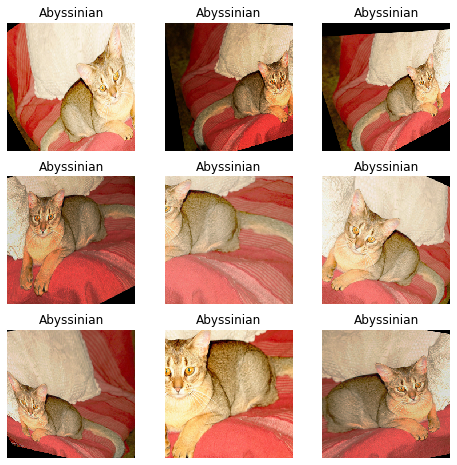

In [9]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

Category american_pit_bull_terrier

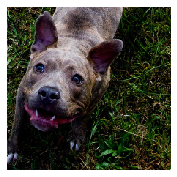

In [10]:
idx = 0
x, y = data.valid_ds[idx]
x.show()
y

In [44]:
filter = tensor([
    [1. , 1. , 1.],
    [0. , 0. , 0.],
    [-1., -1., -1.]
]).expand(1, 3, 3, 3)

In [45]:
filter

tensor([[[[ 1.,  1.,  1.],
          [ 0.,  0.,  0.],
          [-1., -1., -1.]],

         [[ 1.,  1.,  1.],
          [ 0.,  0.,  0.],
          [-1., -1., -1.]],

         [[ 1.,  1.,  1.],
          [ 0.,  0.,  0.],
          [-1., -1., -1.]]]])

In [46]:
x.data[None].shape

In [47]:
horizontal_edge = F.conv2d(x.data[None], filter, padding=1)

In [51]:
r1 = apply_filter(x1, filter1)
r2 = apply_filter(x1, filter2)
r1.shape

torch.Size([1, 224, 224])

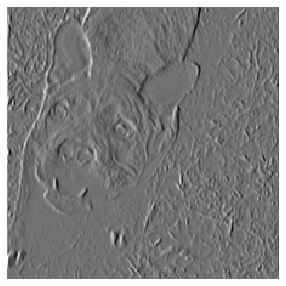

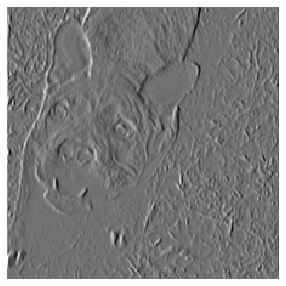

In [50]:
show_image(edge[0], figsize=(5,5))